<a href="https://colab.research.google.com/github/kaido-kimono/Demo/blob/master/Colab_chat_chien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

68608000/68606236 [==============================] - 1s 0us/step
le total des images de chat pour entrainement est de: 1000
le total des images de chien pour entrainement est de: 1000
le total des images de chat pour validation est de: 500
le total des images de chien pour validation est de: 500
----!----
le total des images pour entrainement est de: 2000
le total des images pour validation est de: 1000
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
20/20 [==============================] - 10s 494ms/step - loss: 0.7052 - accuracy: 0.5130 - val_loss: 0.6875 - val_accuracy: 0.5840
Epoch 2/100
20/20 [==============================] - 10s 495ms/step - loss: 0.6847 - accuracy: 0.5585 - val_loss: 0.6687 - val_accuracy: 0.6100
Epoch 3/100
20/20 [==============================] - 10s 490ms/step - loss: 0.6709 - accuracy: 0.5615 - val_loss: 0.6495 - val_accuracy: 0.6210
Epoch 4/100
20/20 [==============================] - 10s 491ms/step - loss: 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:136: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


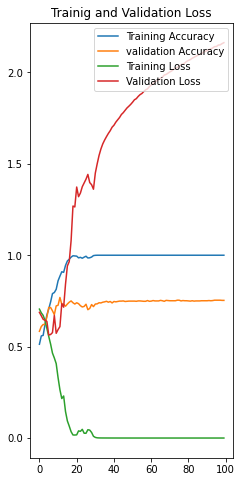

In [1]:
import tensorflow as tf 

# allow to read data from the disk
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# downloading images from Disk
_URL =  'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

# listing directories
#zip_dir_base = os.path.dirname(zip_dir)
#!find $zip_dir_base -type d -print

# assign variables with the path

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir,'dogs') # directory with our validation dog pictures

# showing how many images we got for each label

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('le total des images de chat pour entrainement est de:', num_cats_tr)
print('le total des images de chien pour entrainement est de:', num_dogs_tr)

print('le total des images de chat pour validation est de:', num_cats_val)
print('le total des images de chien pour validation est de:', num_dogs_val)
print("----!----")
print("le total des images pour entrainement est de:", total_train)
print("le total des images pour validation est de:", total_val )

BATCH_SIZE = 100 # Number of training examples to process before updating our model (lot d'images par iteration)
IMG_SHAPE = 150 # our training data consists of images with width of 150 pixels and height of 150 pixels

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) #Generator for our validation data

# loadin images from the disk, apply rescaling, resizinf them
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

#sample_training_images, _= next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
#def plotImages(images_arr):
 #   fig, axes = plt.subplots(1, 5, figsize=(20,20))
  #  axes = axes.flatten()
   # for img, ax in zip(images_arr, axes):
    #    ax.imshow(img)
    #plt.tight_layout()
    #plt.show()

#plotImages(sample_training_images[:5]) # plot images 0-4

# define the model
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2,2),
          
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(2)
])

# compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.summary()

EPOCHS = 100
history = model.fit_generator(
                train_data_gen,
                steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                epochs=EPOCHS,
                validation_data=val_data_gen,
                validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
                )

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Trainig and Validation Loss')
plt.savefig('./foo.png')
plt.show()

